In [1]:
import csv

import math
import random

import matplotlib.pyplot as plt

In [2]:
# Load Dataset
dataset_path = "dataset.csv"
column_name = "User Rating"

# Read CSV File
ratings = []
with open(dataset_path, "r", encoding="utf8") as file:
    reader = csv.DictReader(file)
    for row in reader:
        ratings.append(float(row[column_name]))

In [3]:
# Find mean of column data
mean = sum(ratings) / len(ratings)
print("Mean: ", mean)

Mean:  4.618363636363641


In [4]:
# Find median of column data
sorted_data = sorted(ratings)
median = sorted_data[len(sorted_data) // 2]
print("Median: ", median)

Median:  4.7


In [5]:
# Find the variance, standard deviation, and standard error
variance = sum((x - mean) ** 2 for x in ratings) / len(ratings)
std_deviation = math.sqrt(variance)
std_error = std_deviation / math.sqrt(len(ratings))

print("Variance: ", variance)
print("Standard Deviation: ", std_deviation)
print("Standard Error: ", std_error)

Variance:  0.05142641322314026
Standard Deviation:  0.2267739253599061
Standard Error:  0.009669672667501142


In [6]:
# Decide the shape of distribution

if mean == median:
    print("The distribution is symmetrical")
elif mean > median:
    print("The distribution is positively skewed")
else:
    print("The distribution is negatively skewed")

The distribution is negatively skewed


In [7]:
# Find outliers if there are any
outliers = []
threshold = 2.5  # Adjust the threshold based on the dataset
for x in ratings:
    z_score = (x - mean) / std_deviation
    if abs(z_score) > threshold:
        outliers.append(x)

print("Outliers: ", outliers)

Outliers:  [3.9, 3.8, 3.8, 3.6, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.3, 4.0, 3.9, 3.9]


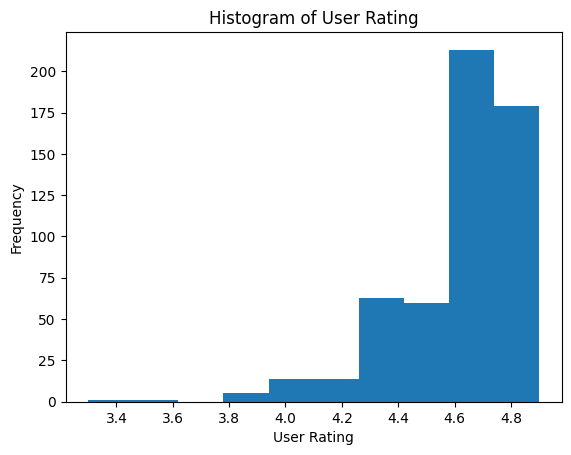

In [8]:
# Graph the column data using a histogram and make comments about the data
plt.hist(ratings, bins=10)  # Adjust the number of bins based on the dataset
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.title("Histogram of " + column_name)
plt.show()

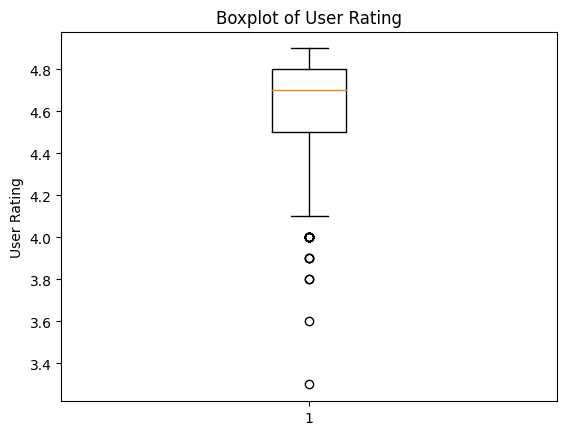

In [9]:
# Draw a boxplot and make comments
plt.boxplot(ratings)
plt.ylabel(column_name)
plt.title("Boxplot of " + column_name)
plt.show()

In [10]:
# Take a specific number of samples and construct a 95% confidence interval for the mean and variance
sample_size = 100  # Adjust the sample size based on the dataset
sample_mean_list = []
sample_var_list = []

for _ in range(sample_size):  # Repeat the process to obtain multiple samples
    sample = random.sample(ratings, sample_size)
    sample_mean = sum(sample) / len(sample)
    sample_mean_list.append(sample_mean)
    sample_var = sum((x - sample_mean) ** 2 for x in sample) / len(sample)
    sample_var_list.append(sample_var)

# Calculate the sample mean and sample variance
sample_mean_mean = sum(sample_mean_list) / len(sample_mean_list)
sample_var_mean = sum(sample_var_list) / len(sample_var_list)

# Calculate the standard error for the sample mean
sample_mean_std_error = math.sqrt(sum((x - sample_mean_mean) ** 2 for x in sample_mean_list) / (len(sample_mean_list) - 1)) / math.sqrt(len(sample_mean_list))

# Calculate the standard error for the sample variance
sample_var_std_error = math.sqrt(sum((x - sample_var_mean) ** 2 for x in sample_var_list) / (len(sample_var_list) - 1)) / math.sqrt(len(sample_var_list))

# Calculate the confidence intervals
confidence_level = 0.95
t_value = 1.984  # For a sample size of 100 and a confidence level of 95%
mean_margin_of_error = t_value * sample_mean_std_error
var_margin_of_error = t_value * sample_var_std_error

mean_confidence_interval = (sample_mean_mean - mean_margin_of_error, sample_mean_mean + mean_margin_of_error)
var_confidence_interval = (sample_var_mean - var_margin_of_error, sample_var_mean + var_margin_of_error)

print("Mean Confidence Interval:", mean_confidence_interval)
print("Variance Confidence Interval:", var_confidence_interval)

Mean Confidence Interval: (4.6168929343839356, 4.624567065616068)
Variance Confidence Interval: (0.04677059024386357, 0.050467349756136426)


In [11]:
# Determine the required sample size to estimate the population mean with a margin of at most 0.1 units and 90% confidence
desired_margin = 0.1  # Adjust the desired margin based on the requirement
desired_confidence = 0.9  # Adjust the desired confidence level based on the requirement

required_sample_size = math.ceil(
    (1.96 * std_deviation / desired_margin) ** 2
    / (desired_confidence * (1 - desired_confidence))
)

print("Required Sample Size:", required_sample_size)


Required Sample Size: 220
